In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## **Load the data**
* We are going to use 'multivariate_housing_prices_in_portlans_oregon.csv' CSV file
* File contains three columns 'size(in square feet)',	'number of bedrooms' and 'price'

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/multivariate_housing_prices_in_portlans_oregon.csv')
print('Dimension of dataset= ', df.shape)
df.head() # To get first n rows from the dataset default value of n is 5

Dimension of dataset=  (47, 3)


,size(in square feet),number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
X = df.values[:, 0:2]  # get input values from first two columns
y = df.values[:, 2]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(5):
    print('X =', X[i, ], ', y =', y[i])

Total no of training examples (m) = 47 

X = [2104    3] , y = 399900
X = [1600    3] , y = 329900
X = [2400    3] , y = 369000
X = [1416    2] , y = 232000
X = [3000    4] , y = 539900


## **Understand the data**
 
* There are total 47 training examples (m= 47 or 47 no of rows)
* There are two features (two columns of feature and one of label/target/y)
* Total no of features (n) = 2

 
### **Feature Normalization**
 
* As you can notice size of the house and no of bedrooms are not in same range(house sizes are about 1000 times the number of bedrooms).
* Sklearn provides libraries to perform the feature normalization. We don't have to write our own function for that.
* During model training we will enable the feature normalization
* To know more about feature normalization please refer 'Feature Normalization' section in [Multivariate Linear Regression From Scratch With Python](http://satishgunjal.github.io/multivariate_lr/) tutorial
 



## **Which Sklearn Linear Regression Algorithm To Choose**
 
* Sklearn library have multiple linear regression algorithms
* Note: The way we have implemented the cost function and gradient descent algorithm in previous tutorials every Sklearn algorithm also have some kind of mathematical model.
* Different algorithms are better suited for different types of data and type of problems
* Flow chart below will give you brief idea on how to choose right algorithm
 
  ![Choosing_Right_Sklearn_Linear_Model.png](https://raw.githubusercontent.com/satishgunjal/images/master/Choosing%20Right%20Sklearn%20Linear%20Model.png)
 



## **Ordinary Least Squares Algorithm**

* This is one of the most basic linear regression algorithm. 
* Mathematical formula used by ordinary least square algorithm is as below,

  ![ordinary_least_squares_formlua.png](https://github.com/satishgunjal/images/blob/master/ordinary_least_squares_formlua_1.png?raw=true)

* The objective of Ordinary Least Square Algorithm is to minimize the residual sum of squares. Here the term residual means 'deviation of predicted value(Xw) from actual value(y)'
* Problem with ordinary least square model is size of coefficients increase exponentially with increase in model complexity


In [ ]:
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X,y) 
# fit() method is used for training the model
# Note the first parameter(feature) is must be 2D array(feature matrix)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### **Understanding Training Results**
* Note: If training is successful then we get the result like above. Where all the default values used by LinearRgression() model are displayed.
* Note that 'normalization = true'
* As per our hypothesis function, 'model' object contains the coef and intercept values

In [ ]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [  139.21067402 -8738.01911233]
intercept=  89597.90954279757


Note that for every feature we get the coefficient value. Since we have two features(size and no of bedrooms) we get two coefficients. Magnitude and direction(+/-) of all these values affect the prediction results.

### **Visualization**
* Check below table for comparison between price from dataset and predicted price by our model
* We will also plot the scatter plot of price from dataset vs predicted weight
 
**Note: Here we are using the same dataset for training the model and to do predictions. Recommended way is to split the dataset and use 80% for training and 20% for testing the model. We will learn more about this in future tutorials.**


In [ ]:
predictedPrice = pd.DataFrame(model_ols.predict(X), columns=['Predicted Price']) # Create new dataframe of column'Predicted Price'
actualPrice = pd.DataFrame(y, columns=['Actual Price'])
actualPrice = actualPrice.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualPrice,predictedPrice],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
Actual Price,399900.000000,329900.000000,369000.000000,232000.000000,539900.000000,299900.000000,314900.000000,198999.000000,212000.00000,242500.000000,239999.000000,347000.000000,329999.000000,699900.000000,259900.00000,449900.000000,299900.000000,199900.000000,499998.000000,599000.000000,252900.000000,255000.000000,242900.00000,259900.000000,573900.000000,249900.000000,464500.000000,469000.000000,475000.000000,299900.00000,349900.000000,169900.000000,314900.000000,579900.000000,285900.000000,249900.000000,229900.000000,345000.000000,549000.000000,287000.00000,368500.000000,329900.000000,314000.000000,299000.000000,179900.000000,299900.000000,239500.000000
Predicted Price,356283.110339,286120.930634,397489.469848,269244.185727,472277.855146,330979.021018,276933.026149,262037.484029,255494.58235,271364.599188,324714.540688,341805.200241,326492.026099,669293.212232,239902.98686,374830.383334,255879.961021,235448.245292,417846.481605,476593.386041,309369.113195,334951.623863,286677.77333,327777.175516,604913.374134,216515.593625,266353.014924,415030.014774,369647.335045,430482.39959,328130.300837,220070.564448,338635.608089,500087.736599,306756.363739,263429.590769,235865.877314,351442.990099,641418.824078,355619.31032,303768.432883,374937.340657,411999.633297,230436.661027,190729.365581,312464.001374,230854.293049


Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

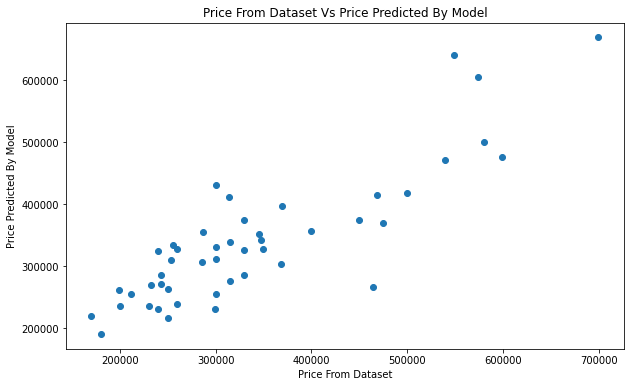

In [ ]:
plt.scatter(y, model_ols.predict(X))
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Price From Dataset Vs Price Predicted By Model")

## **Testing the model**
* **Question: Estimate the price of a 1650 sq-ft, 3-bedroom house**
* We can simply use 'predict()' of sklearn library to predict the price of the house

In [ ]:
price = model_ols.predict([[2104,    3]])
print('Predicted price of a 1650 sq-ft, 3 br house:', price)

Predicted price of a 1650 sq-ft, 3 br house: [356283.1103389]


## **Ridge Regression Algorithm**
* Ridge regression addresses some problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients
* Ridge model uses complexity parameter alpha to control the size of coefficients
* Note: alpha should be more than '0', or else it will perform same as ordinary linear square model
* Mathematical formula used by Ridge Regression algorithm is as below,
 
  ![ridge_regression_formlua.png](https://github.com/satishgunjal/images/blob/master/ridge_regression_formlua_1.png?raw=true)
 



In [ ]:
model_r = linear_model.Ridge(normalize= True, alpha= 35)
model_r.fit(X,y)
print('coef= ' , model_r.coef_)
print('intercept= ' , model_r.intercept_)
price = model_r.predict([[2104,    3]])
print('Predicted price of a 1650 sq-ft, 3 br house:', price)

coef=  [   3.70764427 1958.37472904]
intercept=  326786.38211867993
Predicted price of a 1650 sq-ft, 3 br house: [340462.38984537]


## **LASSO Regression Algorithm**
* Similar to Ridge regression LASSO also uses regularization parameter alpha but it estimates sparse coefficients i.e. more number of 0 coefficients
* That's why its best suited when dataset contains few important features
* LASSO model uses regularization parameter alpha to control the size of coefficients
* Note: alpha should be more than '0', or else it will perform same as ordinary linear square model
* Mathematical formula used by LASSO Regression algorithm is as below,
 
  ![lasso_regression_formlua.png](https://github.com/satishgunjal/images/blob/master/lasso_regression_formlua_1.png?raw=true)



In [ ]:
model_l = linear_model.Lasso(normalize= True, alpha= 0.55)
model_l.fit(X,y)
print('coef= ' , model_l.coef_)
print('intercept= ' , model_l.intercept_)
price = model_l.predict([[2104,    3]])
print('Predicted price of a 1650 sq-ft, 3 br house:', price)

coef=  [  139.19963776 -8726.55682971]
intercept=  89583.65169819258
Predicted price of a 1650 sq-ft, 3 br house: [356280.01905528]


## **Conclusion**
 
As you can notice with Sklearn library we have very less work to do and everything is handled by library. We don't have to add column of ones, no need to write our cost function or gradient descent algorithm. We can directly use library and tune the hyper parameters (like changing the value of alpha) till the time we get satisfactory results. If you are following my machine learning tutorials from the beginning then implementing our own gradient descent algorithm and then using prebuilt models like Ridge or LASSO gives us very good perspective of inner workings of these libraries and hopeful it will help you understand it better.